
## Begin by loading up the data and previewing it

In [196]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas import to_datetime
from fbprophet import Prophet
from pandas import DataFrame
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' )

data = pd.read_csv('/content/document.csv')

In [197]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              144 non-null    object 
 1   Product Sales      48 non-null     float64
 2   Competitors Sales  48 non-null     object 
dtypes: float64(1), object(2)
memory usage: 3.5+ KB


,Month,Product Sales,Competitors Sales
0,Jan-17,5199714.768,"684,331.20"
1,Feb-17,5008533.574,"651,685.01"
2,Mar-17,5445625.334,"649,771.26"
3,Apr-17,4983083.852,"676,788.80"
4,May-17,5840579.541,"683,271.06"


Precrocessing of Data is done in Excel itself

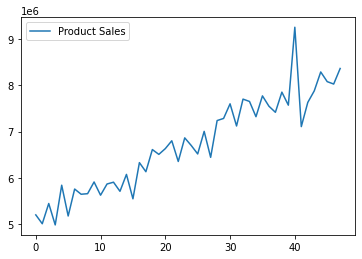

In [198]:
df = data[['Month','Product Sales']]
df.plot()
pyplot.show()

## Preprocessing data according to Fbprophet Algorithm

In [208]:
# df field with dates
# y sales of product
# convert month field in dates format
dates = []
for j in range(0,4):
  k = 2017+j
  for i in range(1, 13):
    date = str(k)+'-%02d' %i
    dates.append([date])
dates = DataFrame(dates)
dates.columns = ['ds']
dates['ds']= to_datetime(dates['ds'])

In [209]:
df = data.iloc[0:48,:]
df.drop('Competitors Sales',axis=1,inplace=True)
df.columns = ['ds', 'y']
df['ds'] = dates
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      48 non-null     datetime64[ns]
 1   y       48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 896.0 bytes


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


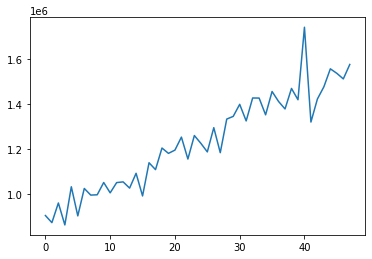

In [210]:
df.y.plot()

In [211]:
model = Prophet()
model.fit(df);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [212]:
future = []
for j in range(0,4):
  k = 2021+j
  for i in range(1, 13):
    date = str(k)+'-%02d' %i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds']) # creating future dates

In [213]:
forecast = model.predict(future)

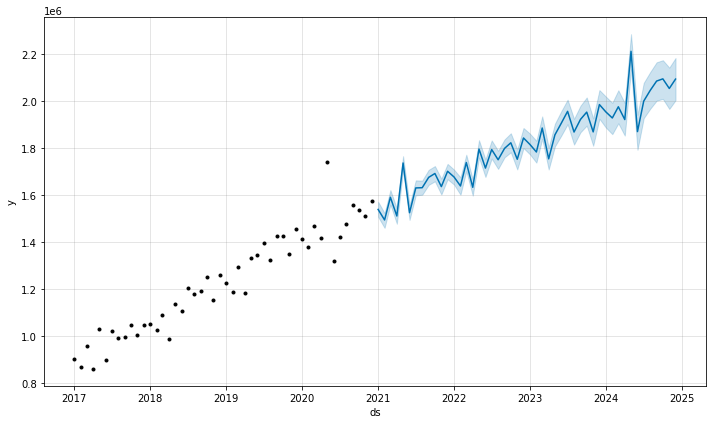

In [214]:
fig1 = model.plot(forecast)  #plot forecast

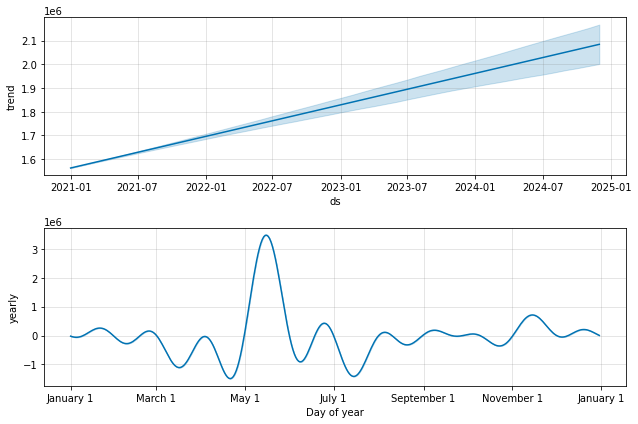

In [215]:
fig2 = model.plot_components(forecast) 
# monthly and yearly forecast

In [217]:
foreacst_21_24 = forecast['yhat']

## Forecasting with Comparator

In [242]:
data.head()

,Month,Product Sales,Competitors Sales
0,Jan-17,43749.10272,"684,331.20"
1,Feb-17,43936.94056,"651,685.01"
2,Mar-17,61879.91096,"649,771.26"
3,Apr-17,36894.04208,"676,788.80"
4,May-17,69638.12724,"683,271.06"


In [258]:
df = data.iloc[0:48,:]
# df.drop('Competitors Sales',axis=1,inplace=True)
df.columns = ['ds', 'y','y2']
df['ds'] = dates
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      48 non-null     datetime64[ns]
 1   y       48 non-null     float64       
 2   y2      48 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [259]:
product = df['y']
comparator = df['y2']
value = max(product)
percent_data = []
for i in range(0,48):
  a = float(((product[i]/value)*100))
  locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
  b = ((locale.atof(comparator[i])/value)*100)
  percent_data.append(a-b)

In [260]:
p = []
for i in range(0,48):
  p.append((percent_data[i]*value)/100)
df['y'] = p
df.drop('y2',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


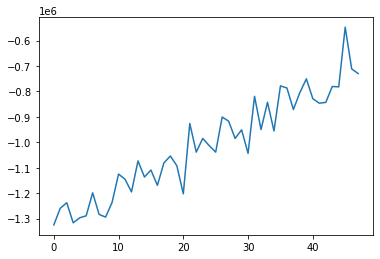

In [261]:
df.y.plot()

In [262]:
model = Prophet()
model.fit(df);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [263]:
future = []
for j in range(0,4):
  k = 2024+j
  for i in range(1, 13):
    date = str(k)+'-%02d' %i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds']) # creating future dates

In [264]:
forecast = model.predict(future)

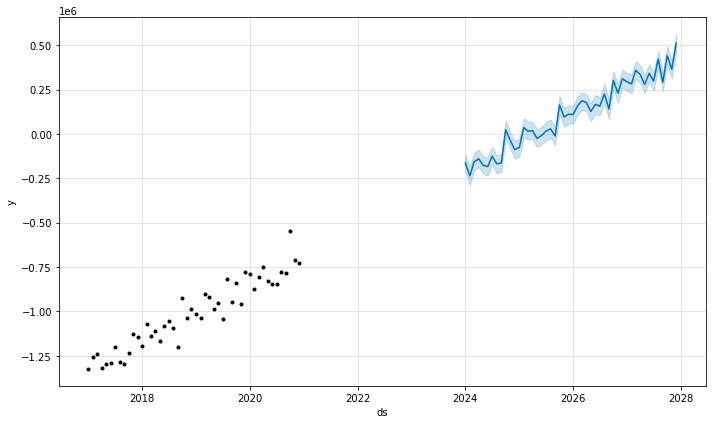

In [265]:
fig1 = model.plot(forecast)  #plot forecast

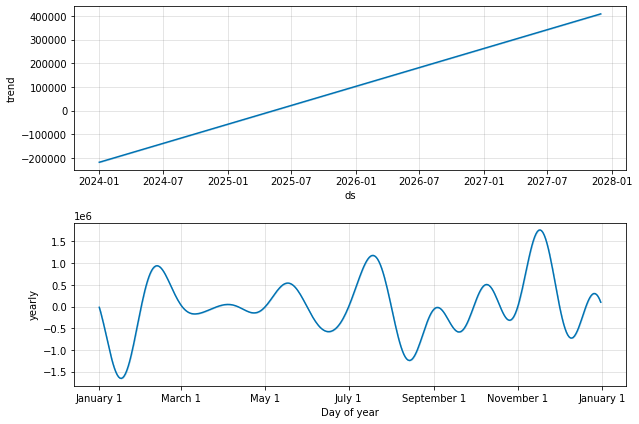

In [266]:
fig2 = model.plot_components(forecast) 
# monthly and yearly forecast

In [267]:
forecast_24_28 = forecast['yhat']

In [268]:
values = []
for i in foreacst_21_24:
  values.append(i)

for i in forecast_24_28:
  values.append(i)

In [279]:
future = []
for j in range(0,8):
  k = 2021+j
  for i in range(1, 13):
    date = str(k)+'-%02d' %i
    future.append([date])
future = DataFrame(future)
future.columns = ['Date']
future['Date']= to_datetime(future['Date']) # creating future dates

In [274]:
future['y'] = values

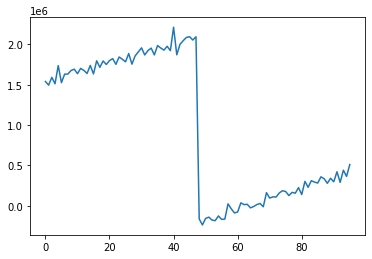

In [275]:
future.y.plot()

In [277]:
future.to_csv('/content/forecast.csv')